# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [707]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from pandas.io.formats.style import plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [708]:
# Read the data from the df_lending_data.csv file into a Pandas DataFrame
df_lending_data = pd.read_csv(Path("Resources/lending_data.csv")
)
# Review the DataFrame
df_lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [557]:
df_lending_data.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


## 1B. Inspecting the Dataframe

### Inspect the dataframe using .shape, .describe and .info methods to check dimensions, 
### look at the statistical aspects and see the type of each column respectively.

In [709]:
print(df_lending_data.shape) 
print()

(77536, 8)



In [710]:
print(df_lending_data.describe()) 
print()

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt   loan_status  
count     77536.000000      77536.000000  77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804      0.032243  
std           1.904426          0.582086   8371.635077      0.176646  
min           0.000000          0.000000      0.000000      0.000000  
25%  

In [711]:
print(df_lending_data.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None



## Using value_counts, how many loan_status transactions are in this dataset?

In [712]:
df_lending_data["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [713]:
# Separate the data into labels/target("the loan_status column") and features of the data(all the columns except "loan_status")

# Separate the y variable, the labels(the y variable should focus on the target column)
y= df_lending_data["loan_status"]

# Separate the X variable, the features(the X variable should include all features except the labels/target)
X = df_lending_data.drop(columns=['loan_status'])

In [714]:
# Review the y variable Series
print (y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [715]:
# Review the X variable DataFrame
print (X)

       loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672            52800        0.431818   
1         8400.0          6.692            43600        0.311927   
2         9000.0          6.963            46100        0.349241   
3        10700.0          7.664            52700        0.430740   
4        10800.0          7.698            53000        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10.595            80300        0.626401   
77534    16300.0         10.068            75300        0.601594   
77535    15600.0          9.742            72300        0.585062   

       num_of_accounts  derogatory_marks  total_debt  
0                    5                 1       22800  
1                    3                 0       13600  
2                 

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [716]:
### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.
y= df_lending_data["loan_status"]
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

## Import the train_test_learn module
### from sklearn.model_selection import train_test_split(already imported)

In [717]:
# Split the data using train_test_split
# from pandas.core.common import random_state

# Assign a random_state of 1 to the function

# Split the dataset using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=1)

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [718]:
#### Model and Fit the Data to a Logistic Regression by using the training data (`X_train` and `y_train`).

## Import the LogisticRegression module from SKLearn
## from sklearn.linear_model import LogisticRegression

## Declare/Instantiate a `LogisticRegression` model.
# Assign a random_state parameter of 1 to the model
Logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = Logistic_regression_model.fit(X_train, y_train)
lr_model 

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [719]:
# Make and save testing predictions with the saved logistic regression model using the test data
# (Make a prediction using the testing data)
y_pred = lr_model.predict(X_test)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [720]:
print(y_test, y_pred)

60914    0
36843    0
1966     0
70137    0
27237    0
        ..
14087    0
6435     0
44373    0
55818    0
37977    0
Name: loan_status, Length: 31015, dtype: int64 [0 0 0 ... 0 0 0]


In [722]:
print("mean sq. error between y_test and predicted =", np.mean(y_pred-y_test)**2)

mean sq. error between y_test and predicted = 2.496023035350615e-06


# Visualization Plots, Shows & Display - Additional supportive infomation

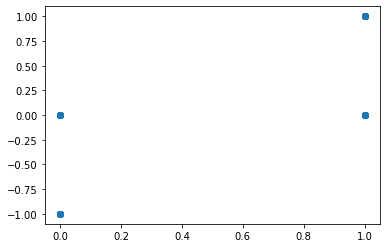

In [723]:
plt.scatter(y_pred, y_pred-y_test)

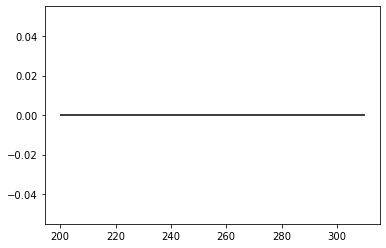

In [724]:
plt.hlines(y=0, xmin=200, xmax=310, colors='k')

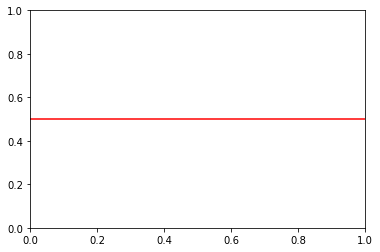

In [725]:
plt.axhline(y=0.5, color='r', linestyle='-')
plt.show()

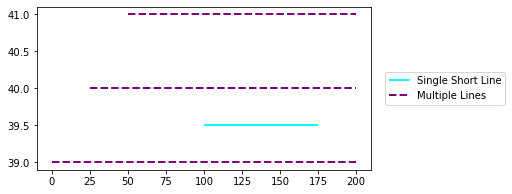

In [726]:
xs = np.linspace(1, 21, 200)
plt.figure(figsize=(6, 3))
plt.hlines(y=39.5, xmin=100, xmax=175, colors='aqua', linestyles='-', lw=2, label='Single Short Line')
plt.hlines(y=[39, 40, 41], xmin=[0, 25, 50], xmax=[len(xs)], colors='purple', linestyles='--', lw=2, label='Multiple Lines')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

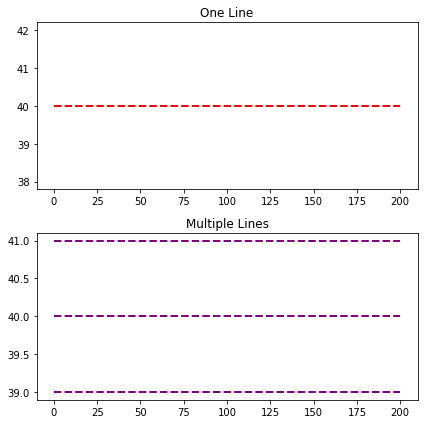

In [727]:
xs = np.linspace(1, 21, 200)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

ax1.hlines(y=40, xmin=0, xmax=len(xs), colors='r', linestyles='--', lw=2)
ax1.set_title('One Line')

ax2.hlines(y=[39, 40, 41], xmin=0, xmax=len(xs), colors='purple', linestyles='--', lw=2)
ax2.set_title('Multiple Lines')

plt.tight_layout()
plt.show()

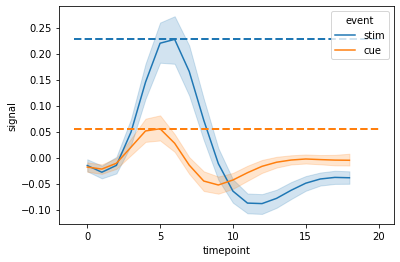

In [728]:
# import seaborn as sns
# sample data
fmri = sns.load_dataset("fmri")

# max y values for stim and cue
c_max, s_max = fmri.pivot_table(index='timepoint', columns='event', values='signal', aggfunc='mean').max()

# plot
g = sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

# x min and max
xmin, ymax = g.get_xlim()

# vertical lines
g.hlines(y=[c_max, s_max], xmin=xmin, xmax=20, colors=['tab:orange', 'tab:blue'], ls='--', lw=2)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [729]:
# Print the balanced_accuracy score of the model

# Display the accuracy score for the test dataset.
balanced_accuracy_score(y_test, y_pred)


0.9469887032029316

In [730]:
print('Testing Accuracy: {}'.format(balanced_accuracy_score(y_test, y_pred)))

Testing Accuracy: 0.9469887032029316


In [731]:
# Training accuracy of the model

training_predictions = lr_model.predict(X_train)

In [732]:
# Review the predictions
training_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [733]:
print('Training Accuracy: {}'.format(balanced_accuracy_score(y_train, training_predictions)))

Training Accuracy: 0.9494929369312922


### Generate a confusion matrix for the model
### Import the model for sklearn's confusion matrix
### from sklearn.metrics import confusion_matrix

In [734]:
## Create and save the confustion matrix for the testing data
test_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix for the testing data
print(test_matrix)

[[29854   151]
 [  102   908]]


## Alternatively

In [735]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[29854,   151],
       [  102,   908]], dtype=int64)

### We can also create and save the confusion matrix for the training data as follows:
training_matrix = confusion_matrix(y_train, training_predictions)

### We can also print the confusion matrix for the training data as follows:
print(training_matrix)

##### from imblearn.metrics import classification_report_imbalanced(imported)

In [736]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.90      1.00      0.95      0.90     30005
          1       0.86      0.90      0.99      0.88      0.95      0.89      1010

avg / total       0.99      0.99      0.90      0.99      0.95      0.90     31015



##### from sklearn.metrics import classification_report, confusion_matrix(imported)


## Print the testing classification report.

In [737]:
# Create and save the testing classifiction report
testing_report = classification_report(y_test, y_pred)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     30005
           1       0.86      0.90      0.88      1010

    accuracy                           0.99     31015
   macro avg       0.93      0.95      0.94     31015
weighted avg       0.99      0.99      0.99     31015



## Print the training classification report.

In [738]:
from sklearn.metrics import classification_report, confusion_matrix
# Create and save the training classifiction report
training_report = classification_report(y_train, training_predictions)

In [739]:
# Print the classification report for the model
print(training_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45031
           1       0.86      0.90      0.88      1490

    accuracy                           0.99     46521
   macro avg       0.93      0.95      0.94     46521
weighted avg       0.99      0.99      0.99     46521



## Plot Confusion Matrix given true and predicted labels.

#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_informative=2, random_state=1)

    >>> from sklearn.svm import SVC
    from sklearn.metrics import plot_confusion_matrix
    X, y = make_classification(random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=1)
    clf = SVC(random_state=1)
    clf.fit(x_train, y_train)
SVC(random_state=1)
    plot_confusion_matrix(clf, X_test, y_test) 
    plt.show()

### Step 2: Answer the following question.

**Question:**: For this dataset, how well did the model predict the actual fraudulent transactions?

**Answer:**: For this test data: Accuracy looks extremely good:  approximately 99% of the transactions in the test data were accurately categorized by the model. However, based on `value_counts`, there were very few transactions in the data that were actually fraudulent, and so our model could have had high accuracy by simply predicting all transactions to be valid. 



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model generated an accuracy score of 99% for the 46521 loans.In order words, Out of 100 predictions, the logistic model predicted the correct element 99 times. Therefore, the accuracy of logistic regression model is 99%; 99 correct predictions of both '0' (healthy loan) and '1'(high-risk loan) labels.Accuracy tells us how many times the logistic regression model was correct overall. On the other hands, Precision is how good the logistic regression model is at predicting a specific category. Recall tells you how many times the logistic regression model model was able to detect a specific category, which in this case is `0` (healthy loan) and `1` (high-risk loan) labels. In this case, the logistic regression model has 99% & 90% recalls when predicting `0` (healthy loan) and `1` (high-risk loan) labels respectively. Also, the model gives a precision for predicting `0` (healthy loan) and `1` (high-risk loan) labels at 100% and 86% respectively. 

Although, no baseline score is provided, apart from the accuracy score of 99% which shows how well the logistic regression model predicts boththe `0` (healthy loan) and `1` (high-risk loan) labels, an F1-score of 100% and 88% respectively for `0` (healthy loan) and `1` (high-risk loan) labels is an indication that the logistic regression model is considered perfect/good for comparing the performance of the two classifiers - `0` (healthy loan) and `1` (high-risk loan) labels. Please note that F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean and it is primarily used to compare the performance of two classifiers. An F1 score is considered perfect when it’s 1, while the model is a total failure when it’s 0.

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

### Import `RandomOverSampler` from `imblearn`.

from collections import Counter

from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler 

X_train, y_train = make_classification(n_classes=2, class_sep=2, 

n_informative=3, n_redundant=1, flip_y=0,

n_features=20, n_clusters_per_class=1, random_state=1)

print('Original dataset shape %s' % Counter(y))


ros = RandomOverSampler(random_state=1)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_resampled))
Counter(y_resampled)

### Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [740]:
# from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

## RandomForestClassifier
## Create and fit a RandomForestClassifier to the Original training data.

In [741]:
# Import the RandomForestClassifier from sklearn
# Instantiate a RandomForestClassifier model
model = RandomForestClassifier()

# Fit the training data to the model
model.fit(X_train, y_train)

RandomForestClassifier()

## Make predictions using the original testing data.

In [742]:
# Predict labels for original testing data
# Make predictions using the initial model
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

 ## Import `RandomOverSampler` from `imblearn`.

In [743]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

### Fit the random over sampler to the original training data.

In [744]:
# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [745]:
# Resample the training data with the RandomOversampler & Check the value_counts for the resampled target.
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 45031, 1: 45031})


### Create and fit a RandomForestClassifier to the oversampled training data.

In [746]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test)

In [747]:
y_pred_oversampled

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

### Print the balanced_accuracy score of the model 

In [748]:
# Print the accuracy score for the original data
baso = balanced_accuracy_score(y_test, y_pred)
print(baso)

0.9396296161860812


In [749]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE model instance
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

# Fit the SMOTE model to the training data
X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled_rf = RandomForestClassifier()
model_resampled_rf.fit(X_resampled, y_resampled)

# Generate predictions based on the resampled data model
rf_resampled_predictions = model_resampled_rf.predict(X_test)

In [750]:
# Print the accuracy score for the resampled data
basrs = balanced_accuracy_score(y_test, rf_resampled_predictions)
print(basrs)

0.9546595369418629


In [751]:
# Print the accuracy score for the oversampled data
basos = balanced_accuracy_score(y_test, y_pred_oversampled)
print(basos)

0.9473573711312141


In [752]:
# Print the confusion matrix for RandomForest on the original data
confusion_matrix(y_test, y_pred)

array([[29858,   147],
       [  117,   893]], dtype=int64)

In [753]:
# Generate a confusion matrix for the model - random forest on oversampled data
confusion_matrix_original = confusion_matrix(y_test, y_pred)
confusion_matrix_original_df = pd.DataFrame(confusion_matrix_original, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
confusion_matrix_original_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),29858,147
Actual Non-Healthy Loans (high-risk),117,893


In [754]:
# Create and save the testing classifiction report
testing_report = classification_report(y_test, y_pred_oversampled)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30005
           1       0.81      0.90      0.85      1010

    accuracy                           0.99     31015
   macro avg       0.90      0.95      0.92     31015
weighted avg       0.99      0.99      0.99     31015



In [755]:
# Print the confusion matrix for RandomForest on the resampled data
confusion_matrix(y_test, rf_resampled_predictions)

array([[29839,   166],
       [   86,   924]], dtype=int64)

In [756]:
# Print the confusion matrix for random forest on oversampled data
confusion_matrix(y_test, y_pred_oversampled)

array([[29787,   218],
       [   99,   911]], dtype=int64)

In [757]:
# Generate a confusion matrix for the model - random forest on oversampled data
confusion_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
cm_oversampled_df = pd.DataFrame(cm_oversampled, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_oversampled_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),29787,218
Actual Non-Healthy Loans (high-risk),100,910


In [758]:
# Create and save the testing classifiction report
testing_report = classification_report(y_test, y_pred_oversampled)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30005
           1       0.81      0.90      0.85      1010

    accuracy                           0.99     31015
   macro avg       0.90      0.95      0.92     31015
weighted avg       0.99      0.99      0.99     31015



In [759]:
# Print the classification report for the original data
print(classification_report_imbalanced(y_test, y_pred))
print(classification_report_imbalanced(y_test, rf_resampled_predictions))
print(classification_report_imbalanced(y_test, y_pred_oversampled))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.88      1.00      0.94      0.89     30005
          1       0.86      0.88      1.00      0.87      0.94      0.87      1010

avg / total       0.99      0.99      0.89      0.99      0.94      0.89     31015

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.92     30005
          1       0.85      0.91      0.99      0.88      0.95      0.90      1010

avg / total       0.99      0.99      0.92      0.99      0.95      0.92     31015

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.90      0.99      0.95      0.90     30005
          1       0.81      0.90      0.99      0.85      0.95      0.89      1010

avg / total       0.99      0.99      0.90      0.99      0.95      0.90     31

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

In random over-sampling, a random set of copies of minority class examples is added to the data. This may increase the likelihood of overfitting, specially for higher over-sampling rates. Moreover, it may decrease the classifier performance and increase the computational effort.The effect can be better performance on the training dataset, but worse performance on the holdout or test dataset. Adapted from https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
   
The oversampled model generated an accuracy score of 99%.In order words, Out of 100 predictions, the logistic model predicted the correct element 99 times. Therefore, the accuracy of logistic regression model is 99%; 99 correct predictions of both '0' (healthy loan) and '1'(high-risk loan) labels. Accuracy tells us how many times the logistic regression model, fit with oversampled data was correct overall. Furthermore, an F1-score of 99% and 85% respectively for `0` (healthy loan) and `1` (high-risk loan) labels is an indication that the logistic regression model, fit with oversampled data is considered near perfect and good for comparing the performance of the two classifiers - `0` (healthy loan) and `1` (high-risk loan) labels. Please note that F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean and it is primarily used to compare the performance of two classifiers. An F1 score is considered perfect when it’s 1, while the model is a total failure when it’s 0.

A lending company might want a model that requires a higher recall because:

healthy loans being identified as a non-healthy loan might be more costly for a lending company since it might cause the loss of customers but it would not be as big of a deal since they have not provided any funds to the customer indicating no loss in terms of money

non-healthy loans being identified as a healthy loan might surely be more costly for a lending company due to the loss of funds being provided by the lender


In [760]:
#RandomForestClassifier
clf =RandomForestClassifier(max_depth=2,random_state=0).fit(X_train, y_train)

print("Accuracy Score is ", balanced_accuracy_score(y_test,clf.predict(X_test)))

Accuracy Score is  0.994675227396094


In [761]:
#BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators=500,
random_state=1)
brfc_model = brfc.fit(X_train,y_train)

print("Accuracy  Score for Balanced Random Forest Classifier is ", balanced_accuracy_score(y_test,brfc.predict(X_test)))

Accuracy  Score for Balanced Random Forest Classifier is  0.9940253357113749


In [762]:
#RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("Number of records for X_train is ", X_train.shape)
print("Number of records for X_resampled oversampling is ",X_resampled.shape)

Number of records for X_train is  (46521, 7)
Number of records for X_resampled oversampling is  (90062, 7)


In [763]:
oclf = RandomForestClassifier(max_depth=2, random_state=1).fit(X_resampled, y_resampled)
print("Accuracy  Score for RandomOverSampler is ", balanced_accuracy_score(y_test,oclf.predict(X_test)))

Accuracy  Score for RandomOverSampler is  0.9946252357280387


Step 8: Evaluate the effectiveness of RandomForest, BalancedRandomForest, and your one additional imbalanced classifier for predicting the minority class.

The above approaches are unique ways to handle the imbalance dataset and improve the prediction accuracy of the minority class.

## RandomForest
First is the RandomForest,can handle imbalanced dataset with class_weight parameter in Random Forrest Classifier and improve the prediction accuracy of the minority class. As expected, the majority class has completely influenced the model, and the trained model has predicted the classification of all records in test dataset as the majority class. Such misclassification prediction in case of non-healthy loans detection or uncommon high-risk loan prediction is very detrimental.Fortunately, Random Forrest Classifier has a parameter “class_weight” to specify the weights of each class in case of an imbalanced dataset.The F1 Score and accuracy score for Random Forest Classifier Model with class weigh compensated is also high, but we can ascertain the real performance by checking the confusion matrix.The drawback is that the majority class has not completely overtaken the Random Forest Classifier Model with weight-adjusted. The Accuracy Score for RandomForest is  99.47%. In order words, Out of 100 predictions, the logistic model predicted the correct element 99.47 times. Therefore, the accuracy of RandomForest model is 99.47%; 99.47 correct predictions of both '0' (healthy loan) and '1'(high-risk loan) labels.

## BalanceRandomForest
This is a different approach to manage the imbalance input training dataset with BalancedRandomForestClassifier in the imbalanced-learn library. This involved training the BalancedRandomForestClassifier with the training dataset and then checked the metrics scores on the testing dataset. Like the above RandomForest model, it also indicates high F1 and accuracy score.
We can see in the confusion matrix that BalancedRandomF. We can see in the confusion matrix that BalancedRandomForestClassifier handles the class weight internally quite well compare to RandomForestClassifier without weight_class parameter. The Accuracy  Score for Balanced Random Forest Classifier is 99.40%. The Accuracy Score for BalanceRandomForest is  99.47%. In order words, Out of 100 predictions, the logistic model predicted the correct element 99.47 times. Therefore, the accuracy of RandomForest model is 99.47%; 99.47 correct predictions of both '0' (healthy loan) and '1'(high-risk loan) labels.


## RandomOverSampler
Next, we will use a completely different approach of oversampling to manage the minority class in the training dataset. The basic idea is to randomly generate examples in the minority class to have a more balanced dataset.
Training dataset fit on RandomOverSampler generated minority class record at random and resampled balanced training data has 90,062 records. Once the training dataset is artificially balanced, then we can train the standard Random Forest Classifier without “class_weight” parameter. The Accuracy  Score for RandomOverSampler is  99.46%. The Accuracy Score for RandomOverSampler is  99.46%. In order words, Out of 100 predictions, the logistic model predicted the correct element 99.46 times. Therefore, the accuracy of lRandomForest model is 99.46%; 99.46 correct predictions of both '0' (healthy loan) and '1'(high-risk loan) labels.

### Question: Does the model generated using one of the imbalanced methods more accurately flag all the loans that eventually defaulted?

Answer: Overall, both resampled models in this example perform better at identifying more of the eventual loan defaults. We can see this by looking at the increase recall for the “default” or “1” category in the two imbalanced models, when compared to the original random forest model.

A higher recall for this category means that of all the loans that actually were in default, how many did this model correctly catch? A higher recall for a model means it’s going to do a better job at making sure any potential defaults are not missed.

However, the higher recall for these two imbalanced models comes at a cost: a greater tendency to flag a loan as a potential default, even when it does not. This is evidenced by a lower precision for these two models. If precision looks at, of all those loans the model predicted as default, how many of them actually were defaults, then a lower precision value means that the model is making a lot of false positives; predicting a default when there isn’t actually one.

This illustrates the main tradeoff when using imbalanced versions of machine learning models. If you really care about identifying those faulty loans (or whatever you’re trying to predict), and the cost of failing to identify a faulty loan is very high, then maybe an imbalanced model with lower precision is worth it. After all, we can always find another business to lend to, but if that business defaults, it’s very costly to us as a lender.

If on the other hand, you have a situation in which the costs of misclassification are the same either way—if failing to correctly identify a 1 has the same practical cost as failing to correctly identify a 0—then we may be better off with the overall higher accuracy of a standard machine learning model.
